# Practica 5 - ANÁLISIS DE SENTIMIENTOS

Gutierrez Cuello Christian Alfredo
5BV1
Ultima modificacion: 26/06/2024 3:22 pm

En esta práctica, además de explorar las metodologías actuales en el análisis de sentimientos, nos sumergiremos en la exploración y normalización de datos. Este proceso es fundamental para comprender la estructura y la calidad de los datos que estamos utilizando en nuestro análisis. Realizaremos un exhaustivo análisis exploratorio para entender la distribución de los datos, identificar posibles anomalías y realizar las transformaciones necesarias para asegurar la consistencia y la fiabilidad de nuestros resultados. La normalización de datos nos permitirá estandarizar la información, lo que facilitará la comparación y el procesamiento posterior, independientemente de la fuente o el formato original de los datos. Integrando estas etapas en nuestro enfoque metodológico, estaremos mejor equipados para abordar el análisis de sentimientos con precisión y eficacia.

# 1. ADQUISICIÓN  DE DATOS

In [1]:
#Carga del dataset
import numpy as np
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# 2. ANÁLISIS EXPLORATORIO DE DATOS

## a. Dimensiones/Columnas

In [2]:
# Filas y columnas del dataset
numRows, numColumns = df.shape
print(f"Numero de filas: {numRows}")
print(f"Numero de columnas: {numColumns}")


Numero de filas: 568454
Numero de columnas: 10


In [3]:
# Imprimir los nombres de las columnas junto con su número de índice en una lista
for i, columna in enumerate(df.columns):
    print(f"{i + 1}. {columna}")

1. Id
2. ProductId
3. UserId
4. ProfileName
5. HelpfulnessNumerator
6. HelpfulnessDenominator
7. Score
8. Time
9. Summary
10. Text


## b.Caracterización de dimensiones

### Categorica o numerica

In [4]:
# Iterar sobre las columnas del DataFrame
for columna in df.columns:
    # Verificar si todos los valores de la columna son numéricos
    es_numerica = pd.to_numeric(df[columna], errors='coerce').notnull().all()
    
    # Imprimir el tipo de la columna
    if es_numerica:
        print(f"La columna '{columna}' es numérica.")
    else:
        print(f"La columna '{columna}' es categórica.")

La columna 'Id' es numérica.
La columna 'ProductId' es categórica.
La columna 'UserId' es categórica.
La columna 'ProfileName' es categórica.
La columna 'HelpfulnessNumerator' es numérica.
La columna 'HelpfulnessDenominator' es numérica.
La columna 'Score' es numérica.
La columna 'Time' es numérica.
La columna 'Summary' es categórica.
La columna 'Text' es categórica.


### Tipos de datos por columna

In [5]:
# Tipos de datos de cada columna
dataTypes = df.dtypes
print("Tipos de dato de cada columna:")
print(dataTypes)

Tipos de dato de cada columna:
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


### Proposito

DATSET de 10 columnas

ID: Números enteros que identifican de manera única cada entrada en el conjunto de datos.

ProductId: Identificadores categóricos de productos, almacenados como cadenas de caracteres.

UserId: Identificadores categóricos de usuarios, almacenados como cadenas de caracteres.

ProfileName: Nombres de perfiles de usuarios, almacenados como cadenas de caracteres.

HelpfulnessNumerator: Números enteros que representan la cantidad de usuarios que encontraron útil la opinión.

HelpfulnessDenominator: Números enteros que indican la cantidad total de usuarios que dieron su opinión sobre si la revisión fue útil o no.

Score: Valoraciones del producto en una escala del 1 al 5, almacenadas como números enteros.

Time: Fecha y hora de la opinión, almacenadas como números enteros.

Summary: Resúmenes de las opiniones, almacenados como cadenas de caracteres.

Text: Opiniones completas, almacenadas como cadenas de caracteres.

## 3.PREPROCESAMIENTO

### a. Dimensiones necesarias vs Dimensiones inecesarias

Ya que el objetivo de esta practica y de los siguientes pasos va enfocado al analisis de sentimientos puro, sin aplicaciones posteriores:

Score: Da la refrencia para poner un sentimiento a las criticas
Text: Es como tal sobre lo que haremos el analisis, las opiniones
Summary: Nos da un versión simplificada de la critica

### b. Eliminar columnas  

In [7]:
# Eliminacion de columnas irrelevantes
colDelete = ['Id','ProductId','UserId' ,'ProfileName','HelpfulnessNumerator' ,'HelpfulnessDenominator' ,'Time']
df = df.drop(colDelete, axis=1)

### Nuevo dataset 

In [8]:
df.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


### c. Conversión Score ->Sentimiento 

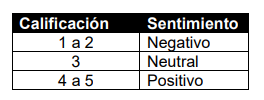

In [9]:
from IPython.display import Image
# Especifica la ruta de la imagen
ruta_imagen = 'Felling.png'

# Muestra la imagen
display(Image(filename=ruta_imagen))

In [10]:
# Creamos una nueva columna 'Sentiment' utilizando expresiones condicionales
df['Sentiment'] = pd.cut(df['Score'], bins=[-float('inf'), 2.5, 3.5, float('inf')], labels=['Negative', 'Neutral', 'Positive'])

# Eliminamos la columna 'Score'
df.drop('Score', axis=1, inplace=True)

In [11]:
df.head()

,Summary,Text,Sentiment
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [12]:
countClass = df['Sentiment'].value_counts()
print(countClass)

Positive    443777
Negative     82037
Neutral      42640
Name: Sentiment, dtype: int64


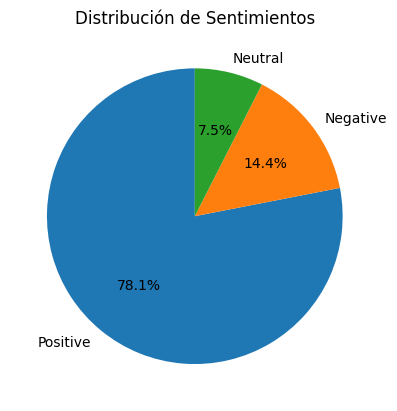

In [13]:
import matplotlib.pyplot as plt

# Contar el número de instancias para cada clase de sentimiento
sentiment_counts = df['Sentiment'].value_counts()

# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots()

# Graficar el gráfico de pastel
ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)

# Añadir título
ax.set_title('Distribución de Sentimientos')

# Mostrar el gráfico
plt.show()

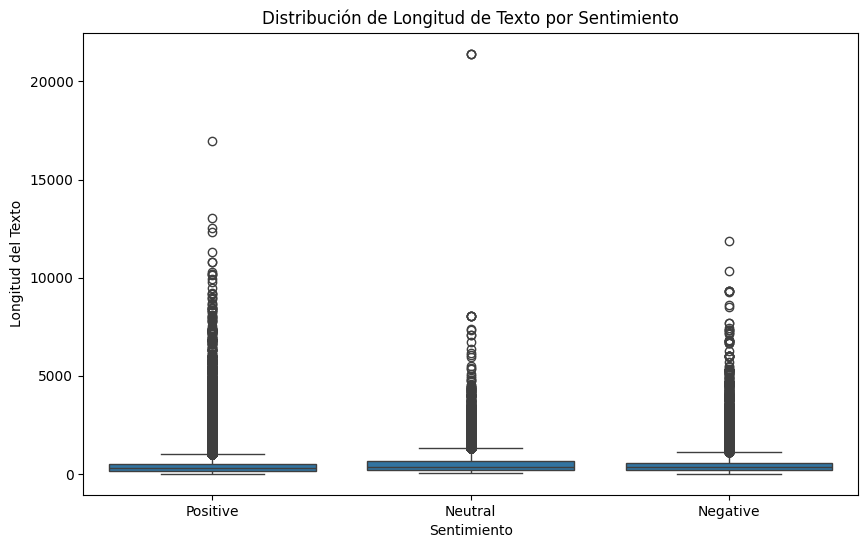

In [ ]:
import seaborn as sns

# Calcular la longitud de los textos para cada clase de sentimiento
df['Text_Length'] = df['Text'].apply(len)

# Visualizar la distribución de la longitud de los textos por clase de sentimiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Text_Length', data=df)
plt.title('Distribución de Longitud de Texto por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Longitud del Texto')
plt.show()


### c. Validar balance de clases

In [14]:
# Numero minimo de instancias entre las clases
minInst = countClass.min()

# Seleccionar un numero igual de instancias para cada clase
dfB = pd.concat([df[df['Sentiment'] == clase].sample(minInst) for clase in countClass.index])

# Mezclar el dataframe equilibrado para desordenar las instancias
dfB = dfB.sample(frac=1).reset_index(drop=True)

In [15]:
dfB.head()

,Summary,Text,Sentiment
0,Love the energy without the super sweet,I was turned on to Vitalyte (at the time calle...,Positive
1,Bad Batch!,This stuff has an off smell! i didn't even bot...,Negative
2,Water is the first ingredient! Thats why it ta...,The reason why this is 58% less fat and calor...,Negative
3,So glad I found these for my bro-in-law's Chri...,I was so disappointed when I was told by my lo...,Positive
4,Wonderful!,Thank you for making this wonderful product av...,Positive


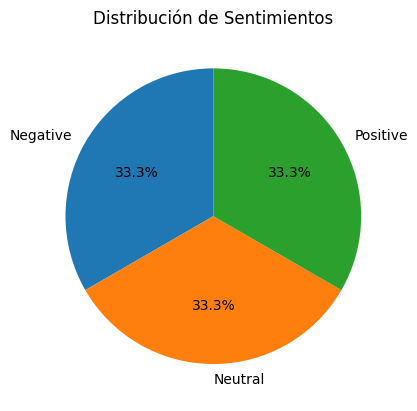

In [16]:
import matplotlib.pyplot as plt

# Contar el número de instancias para cada clase de sentimiento
sentiment_counts = dfB['Sentiment'].value_counts()

# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots()

# Graficar el gráfico de pastel
ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)

# Añadir título
ax.set_title('Distribución de Sentimientos')

# Mostrar el gráfico
plt.show()

In [17]:
countClases = dfB['Sentiment'].value_counts()
print(countClases)

Negative    42640
Neutral     42640
Positive    42640
Name: Sentiment, dtype: int64


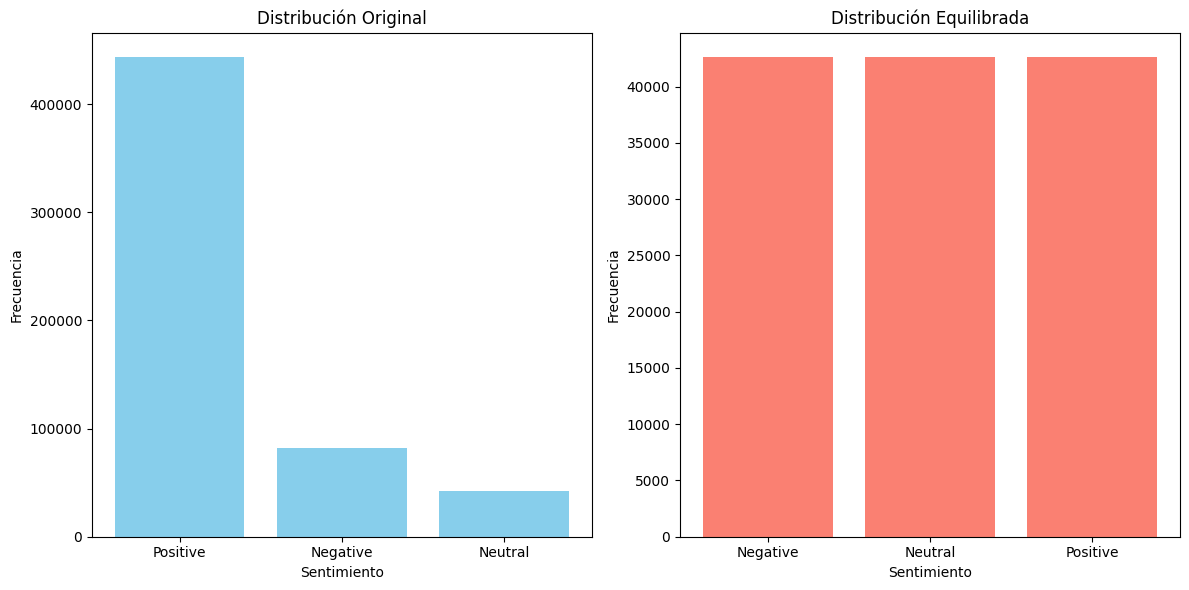

In [18]:
import matplotlib.pyplot as plt

# Calcular el recuento de clases de sentimiento antes de equilibrar
countClass_original = df['Sentiment'].value_counts()

# Calcular el recuento de clases de sentimiento después de equilibrar
countClass_equilibrado = dfB['Sentiment'].value_counts()

# Crear subgráficos para mostrar ambas distribuciones
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para la distribución original
axs[0].bar(countClass_original.index, countClass_original.values, color='skyblue')
axs[0].set_title('Distribución Original')
axs[0].set_xlabel('Sentimiento')
axs[0].set_ylabel('Frecuencia')

# Gráfico de barras para la distribución equilibrada
axs[1].bar(countClass_equilibrado.index, countClass_equilibrado.values, color='salmon')
axs[1].set_title('Distribución Equilibrada')
axs[1].set_xlabel('Sentimiento')
axs[1].set_ylabel('Frecuencia')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


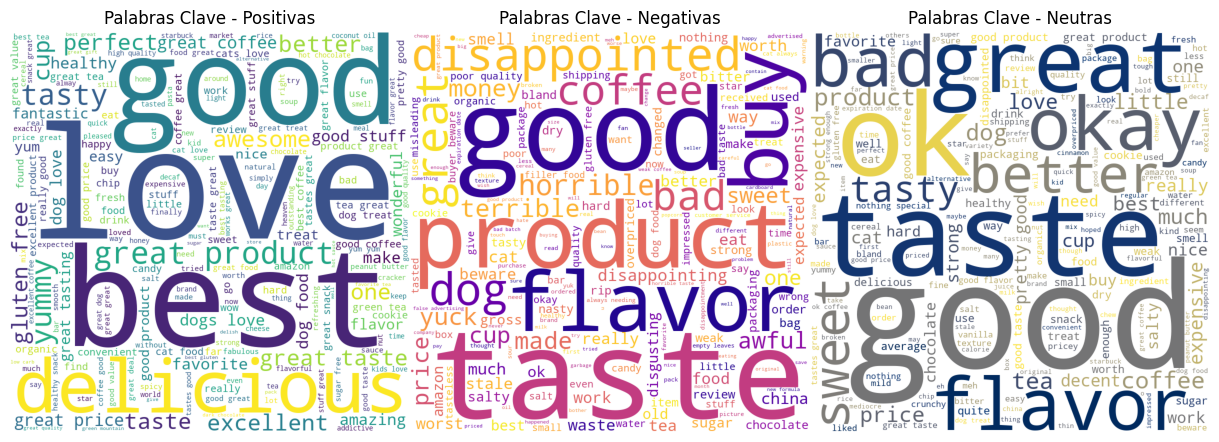

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convertir valores de la columna 'Summary' a cadenas de texto
df['Summary'] = df['Summary'].astype(str)

# Aquí solo se realiza la conversión a minúsculas
df['Summary'] = df['Summary'].str.lower()

# Filtrar el DataFrame por clase de sentimiento
positive_texts = ' '.join(df[df['Sentiment'] == 'Positive']['Summary'])
negative_texts = ' '.join(df[df['Sentiment'] == 'Negative']['Summary'])
neutral_texts = ' '.join(df[df['Sentiment'] == 'Neutral']['Summary'])

# Definir una paleta de colores diferente para cada nube de palabras
positive_color = 'viridis'
negative_color = 'plasma'
neutral_color = 'cividis'

# Generar nubes de palabras para cada clase de sentimiento
wordcloud_positive = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                colormap = positive_color,  # Aquí se establece el color de la nube
                min_font_size = 10).generate(positive_texts)
  
wordcloud_negative = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                colormap = negative_color,  # Aquí se establece el color de la nube
                min_font_size = 10).generate(negative_texts)
  
wordcloud_neutral = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                colormap = neutral_color,  # Aquí se establece el color de la nube
                min_font_size = 10).generate(neutral_texts)

# Mostrar las nubes de palabras
plt.figure(figsize = (12, 12), facecolor = None) 
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive) 
plt.axis("off") 
plt.title('Palabras Clave - Positivas')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative) 
plt.axis("off") 
plt.title('Palabras Clave - Negativas')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral) 
plt.axis("off") 
plt.title('Palabras Clave - Neutras')

plt.tight_layout(pad = 0) 
  
plt.show()

## 4.Limpieza de datos

## Identificación de terminos que sean ruido

### Analisis manual  Revisión visual

In [20]:
# Imprimir el texto completo de la columna 'Text' desde la opinión número 1 hasta la opinión número 100
for i in range(1, 1000):
    print(dfB['Text'][i])
    

This stuff has an off smell! i didn't even bother using it...<br />I'm going with Wabash, since the little sample of coconut oil I got with their popcorn maker actually smells extremely pleasant!<br />Not this stuff..and they're supposed to be the same...coconut oil with a touch of coloring..
The reason why this is 58% less fat and  calories than the regular is because water is the first ingredient..........<br />there is no water at all in the regular Coconut milk and its the same price in the stores. Save your money and buy the<br />regular and add your own water! You will have  watery coconut milk and it will be a lot cheaper!
I was so disappointed when I was told by my local warehouse chain that they stopped carrying these, but was delighted to find them on Amazon! Hooray! And they arrived promptly without any damage. This really made my brother in law's Christmas!
Thank you for making this wonderful product available and with such quick delivery.  I appreciate the competitive pric

In [21]:
# Guardar el DataFrame resultante en un nuevo archivo CSV
dfB.to_csv('dfB.csv', index=False)

### Analisis con regex

##### Generar archivo con muestra representativa

In [22]:
# Ruta del archivo de texto donde se guardará el texto
archivo_salida = 'opiniones.txt'

# Abrir el archivo en modo escritura
with open(archivo_salida, 'w', encoding='utf-8') as archivo:
    # Iterar sobre las opiniones desde la número 1 hasta la número 100
    for i in range(1, 50000):
        # Escribir la opinión en el archivo
        archivo.write(dfB['Text'][i] + '\n')

# Emoticons

In [23]:
import re

# Ruta del archivo de texto
archivo_entrada = 'opiniones.txt'

# Función para buscar emoticones en el archivo
def buscar_emoticones(archivo):
    emoticones_encontrados = []
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()
        resultados = re.findall(r'[:;=]-?[)\(DPO3\[\]/\\|]', texto)
        cantidad_emoticones = len(resultados)
        emoticones_encontrados = list(set(resultados))  # Eliminar duplicados
    return cantidad_emoticones, emoticones_encontrados

# Llamar a la función y mostrar el resultado
cantidad, emoticones = buscar_emoticones(archivo_entrada)
if cantidad > 0:
    print(f"Se encontraron {cantidad} emoticones en el archivo:")
    for emoticon in emoticones:
        print(emoticon)
else:
    print("No se encontraron emoticones en el archivo.")



Se encontraron 2691 emoticones en el archivo:
:-(
:-D
:-)
:D
=]
:)
:P
:\
=P
=D
;D
;O
:(
=[
=\
:O
:3
;3
=/
:-/
;[
:[
=)
=3
;)
;-(
:/
=(
:]
;-)
:|


# Numeros

In [24]:
import re

# Ruta del archivo de texto
archivo_entrada = 'opiniones.txt'

# Función para buscar números de teléfono en el archivo
def buscar_numeros_telefono(archivo):
    numeros_telefono_encontrados = []
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()
        # Expresión regular para buscar números de teléfono
        patron_telefono = re.compile(r'\b(?:\+\d{1,2}\s*(?:\(\d{1,3}\))?)?\s*(?:\d{1,4}[-\s])?\d{1,4}[-\s]?\d{1,4}\b')
        # Buscar números de teléfono en el texto
        numeros_telefono_encontrados = patron_telefono.findall(texto)
        cantidad_numeros_telefono = len(numeros_telefono_encontrados)
    return cantidad_numeros_telefono, numeros_telefono_encontrados

# Llamar a la función y mostrar el resultado
cantidad, numeros_telefono = buscar_numeros_telefono(archivo_entrada)
if cantidad > 0:
    print(f"Se encontraron {cantidad} números en el archivo:")
    for numero in numeros_telefono:
        print(numero)
else:
    print("No se encontraron números en el archivo.")


Se encontraron 22638 números en el archivo:
 58
 80
21
150
000
 11
 30
 2011
 12
30
15
 30
 100
 160
20
 02
12
 12
43
 100
 2012
 97
 10
12
 2-3
38
 24
 192
 420
 140
 60
 192
 192
 29
 11
 12
13
 14
 16
 110
 1964
 21
80
00
 14
 10
 14
10
 40
2011
 10
 15
 15
 6-7
 1950
 40
 1970
 1980
 55
 12
 45
150
80
5000
00
5000
00
95
11
95
20
00
 29
2012
 20
10
99
 16
09
 23
45
 45
 100
 10
 84
 90
 26
 27
12
85
11
85
100
 163
100
 20
100
10
 10
120
2010
 60
 24
 12
14
 12
 10
  12
 13
09
 16
 1970
40
 10
10
 24
 5-10
 100
 1-2
 1988
 23
 40
 36
 12
 93
12
 26
 100
 18
 2-3
 12
 10
 45
 60
 80
80
25
25
13
 64
15
2012
 15
 50
 3-7
 20
 100
32
 66
 20
35-50
75
172
80
19
240
10
 12
14
 16
99
12
 100
 6-8
 30
24
 17
 24
 10
 12
 50
 50
36
43
35
79
 50
64
18
45
18
45
 10
 10
 12-15
 11
 13
 10
 23
2011
17
 110
15
15
 100
 90
15
95
 16
30
40
45
85
 40
 20
 80
 12
 15
 10
 100
 100
 135
 11
 100
 99
 15
50
100
 15
38
99
 15
90
89
 50
 50
 100
 24
 12
40
  120
  40
  40
  40
  40
  10
 30
18
 10
 24
50


# Carcteres especiales

In [25]:
import re

# Ruta del archivo de texto
archivo_entrada = 'opiniones.txt'

# Expresión regular para encontrar caracteres que no sean palabras en inglés
patron_no_palabras_ingles = re.compile(r'[^a-zA-Z\s]')

# Función para encontrar caracteres que no sean palabras en inglés en un archivo de texto
def encontrar_no_palabras_ingles(archivo):
    no_palabras_ingles_encontradas = []
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()
        no_palabras_ingles_encontradas = patron_no_palabras_ingles.findall(texto)
    return no_palabras_ingles_encontradas

# Llamar a la función y obtener los caracteres que no sean palabras en inglés encontrados en el archivo
caracteres_no_palabras_ingles_encontrados = encontrar_no_palabras_ingles(archivo_entrada)

# Imprimir los caracteres que no sean palabras en inglés encontrados
print(caracteres_no_palabras_ingles_encontrados)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#  HTML

In [26]:
import re

# Ruta del archivo de texto
archivo_entrada = 'opiniones.txt'

# Expresión regular para encontrar enlaces HTML
patron_enlace = re.compile(r'<a\s+href="https?://(?:\w+\.)+\w+/\S*?"')

# Función para encontrar enlaces HTML en un archivo de texto
def encontrar_enlaces(archivo):
    enlaces_encontrados = []
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()
        enlaces_encontrados = patron_enlace.findall(texto)
    return len(enlaces_encontrados), enlaces_encontrados

# Llamar a la función y obtener la cantidad y los enlaces encontrados en el archivo
cantidad_enlaces, enlaces_encontrados = encontrar_enlaces(archivo_entrada)

# Imprimir la cantidad de enlaces y los enlaces encontrados
print(f"Se encontraron {cantidad_enlaces} enlaces HTML en el archivo:")
for enlace in enlaces_encontrados:
    print(enlace)


Se encontraron 1421 enlaces HTML en el archivo:
<a href="http://www.amazon.com/gp/product/B0017RLGX0"
<a href="http://www.amazon.com/gp/product/B000E63LQU"
<a href="http://www.amazon.com/gp/product/B000FYVKRS"
<a href="http://www.amazon.com/gp/product/B0040PYTXU"
<a href="http://www.amazon.com/gp/product/B004IRGDFW"
<a href="http://www.amazon.com/gp/product/B00271OPVU"
<a href="http://www.amazon.com/gp/product/B001RJ91IK"
<a href="http://www.amazon.com/gp/product/B004KBHEQI"
<a href="http://www.amazon.com/gp/product/B001QTVS5K"
<a href="http://www.amazon.com/gp/product/B0001ES9FI"
<a href="http://www.amazon.com/gp/product/B004XZMD2G"
<a href="http://www.amazon.com/gp/product/B001E5DXY0"
<a href="http://www.amazon.com/gp/product/B0043GFKG6"
<a href="http://www.amazon.com/gp/product/B000634HD2"
<a href="http://www.amazon.com/gp/product/0813819857"
<a href="http://www.amazon.com/gp/product/B000SAFNPE"
<a href="http://www.amazon.com/gp/product/B004KNJS5G"
<a href="http://www.amazon.com/gp/

In [27]:
import re

# Ruta del archivo de texto
archivo_entrada = 'opiniones.txt'

# Expresión regular para encontrar el patrón <br />
patron_br = re.compile(r'<br />')

# Función para encontrar el patrón <br /> en un archivo de texto
def encontrar_br(archivo):
    br_encontrados = []
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()
        br_encontrados = patron_br.findall(texto)
        cantidad_br = len(br_encontrados)
    return cantidad_br, br_encontrados

# Llamar a la función y obtener la cantidad y los patrones <br /> encontrados en el archivo
cantidad_br, br_encontrados = encontrar_br(archivo_entrada)

# Imprimir la cantidad de ocurrencias y los patrones <br /> encontrados
print(f"Se encontraron {cantidad_br} ocurrencias del patrón <br />.")
print("Patrones encontrados:")
print(br_encontrados)

Se encontraron 64686 ocurrencias del patrón <br />.
Patrones encontrados:
['<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br />', '<br 

# LINKS 

In [28]:
import re

def encontrar_links(archivo):
    patron = re.compile(r'https?://\S+')
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()
        links = patron.findall(texto)
        cantidad_links = len(links)
    return cantidad_links, links

archivo_entrada = 'opiniones.txt'
cantidad_links, links = encontrar_links(archivo_entrada)
print(f"Se encontraron {cantidad_links} enlaces en el archivo:")
print(links)

Se encontraron 1485 enlaces en el archivo:
['http://www.amazon.com/gp/product/B0017RLGX0">Phillippine', 'http://www.amazon.com/gp/product/B000E63LQU">Celestial', 'http://www.amazon.com/gp/product/B000FYVKRS">Buffalo', 'http://www.amazon.com/gp/product/B0040PYTXU">Libby\'s', 'http://www.amazon.com/gp/product/B004IRGDFW">Millstone', 'http://www.amazon.com/gp/product/B00271OPVU">Coombs', 'http://www.amazon.com/gp/product/B001RJ91IK">Emerald', 'http://www.amazon.com/gp/product/B004KBHEQI">Miracle', 'http://www.amazon.com/gp/product/B001QTVS5K">Senseo', 'http://www.amazon.com/gp/product/B0001ES9FI">Senseo', 'http://www.amazon.com/gp/product/B004XZMD2G">Senseo', 'http://www.amazon.com/gp/product/B001E5DXY0">Taylors', 'http://www.amazon.com/gp/product/B0043GFKG6">Hellmann\'s', 'http://www.amazon.com/gp/product/B000634HD2">Natural', 'http://www.amazon.com/gp/product/0813819857">Blackwell\'s', 'http://www.amazon.com/gp/product/B000SAFNPE">Ginger,', 'http://www.amazon.com/gp/product/B004KNJS5G">

# CORREOS

In [29]:
def encontrar_correos(archivo):
    patron = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()
        correos = patron.findall(texto)
        cantidad_correos = len(correos)
    return cantidad_correos, correos

cantidad_correos, correos = encontrar_correos(archivo_entrada)
print(f"Se encontraron {cantidad_correos} direcciones de correo electrónico en el archivo:")
print(correos)

Se encontraron 14 direcciones de correo electrónico en el archivo:
['mas2348@aol.com', 'MusicRocksInAustin@gmail.com', 'jeffm@almostedenplants.com', 'mas2348@aol.com', 'silver-list@eskimo.com', 'timbre440@yahoo.com', 's...@coppermooncoffee.com', 'cats.guide@about.com', 'mas2348@aol.com', 'kctuscroke@cox.net', 'dnorvell@insightbb.com', 'MusicRocksInAustin@gmail.com', 'stanmignyc@yahoo.com', 'jimjohnson@dbezona.com']


# FECHAS Y HORAS

In [30]:
def encontrar_fechas_horas(archivo):
    patron = re.compile(r'\b(?:\d{1,2}[/-]\d{1,2}[/-]\d{2,4}|\d{1,2}:\d{2}(?::\d{2})?\s*(?:AM|PM)?)\b')
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()
        fechas_horas = patron.findall(texto)
        cantidad_fechas_horas = len(fechas_horas)
    return cantidad_fechas_horas, fechas_horas

cantidad_fechas_horas, fechas_horas = encontrar_fechas_horas(archivo_entrada)
print(f"Se encontraron {cantidad_fechas_horas} fechas y horas en el archivo:")
print(fechas_horas)

Se encontraron 415 fechas y horas en el archivo:
['1:13', '2/24/11', '12/2/11', '5:41 ', '1/31/2013', '1/6/11', '5/29/12', '5/26/12', '12/10/11', '11/17/2011', '1-27-10', '2:00 ', '2/25/12', '3:00 ', '05/12/2012', '5/15/2012', '26/1/05', '1/14/12', '4-11-08', '7-7-08', '11/28/11', '2:00 ', '4/18/2011', '5/3/2011', '10:30 ', '9/7/2012', '7/22/08', '0:44 ', '1:30', '1/6/12', '03/29/11', '1/12/2012', '4/1/2012', '12/10/11', '1:01 ', '10/11/11', '10:30 ', '4/8/09', '5/15/11', '11/08/08', '9/13/12', '9/15/12', '9:30', '1-15/16', '3/19/11', '8/12/11', '10/31/10', '09-02-11', '9:59 ', '9:08 ', '6/25/10', '6:30 AM', '0:47 ', '9/24/11', '2-22-2012', '12/31/11', '1/6/12', '9/12/2009', '8:12', '12/15/09', '12/29/09', '10:39AM', '08/22/12', '12/28/10', '01/08/2011', '07/31/2010', '7/26/12', '9/12/2009', '1/24/12', '10/9/2012', '9/12/2009', '6/6/2012', '8/5/11', '07/31/2010', '3:00 ', '7/12/2012', '10/4/2010', '19:78', '5/6/10', '9/30/08', '9/22/08', '8/11/2011', '6:00 PM', '7:00 PM', '12/9/10', '5

# HASHTAGS

In [31]:
def encontrar_hashtags(archivo):
    patron = re.compile(r'#\w+')
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()
        hashtags = patron.findall(texto)
        cantidad_hashtags = len(hashtags)
    return cantidad_hashtags, hashtags

cantidad_hashtags, hashtags = encontrar_hashtags(archivo_entrada)
print(f"Se encontraron {cantidad_hashtags} hashtags en el archivo:")
print(hashtags)


Se encontraron 268 hashtags en el archivo:
['#2', '#7', '#1', '#2', '#2', '#5', '#6', '#1', '#2', '#3', '#4', '#2', '#4', '#4', '#4', '#2', '#2', '#7', '#7', '#2', '#2', '#3', '#40', '#6', '#2', '#3', '#1', '#1', '#1', '#2', '#1', '#2', '#1', '#1', '#2', '#3', '#1', '#2', '#3', '#2', '#1', '#1', '#1', '#5', '#1', '#128078', '#7', '#7', '#7', '#1', '#1', '#1', '#2', '#2', '#1', '#1', '#1', '#1', '#730', '#1', '#1', '#30lbs', '#1', '#1', '#1', '#2', '#3', '#1', '#7', '#7', '#2', '#1', '#10', '#1', '#2', '#1', '#1', '#1', '#1', '#2', '#4', '#7', '#1', '#1', '#1', '#2', '#1', '#1', '#2', '#1', '#2', '#1', '#2', '#3', '#3', '#1', '#2', '#1', '#40', '#2', '#2', '#2', '#1', '#40', '#6', '#7', '#1', '#2', '#4', '#5', '#1', '#1', '#2', '#3', '#2', '#3', '#2', '#4', '#1', '#2', '#1', '#2', '#2', '#4', '#7', '#5', '#6', '#2', '#4', '#1', '#1', '#1', '#1', '#40', '#1', '#1', '#JustSaying', '#1', '#2', '#3Da', '#4', '#4', '#1', '#2', '#3', '#1', '#1', '#1', '#2', '#4', '#4', '#6', '#5', '#3', '#1',

# Justificación

- <\br> se presenta en varios comentarios y no aporta información: se eliminan
- Emoticonos, depende de la tecnica de analisis de snetimientoa usar, por ejemplo para los diccionarios que ya estan predefindos,si no tienen o reonocen algun emoticono podria bajar la eficiencia, se porbara con ambos
- Contracciones del idioma ingles, se ampliaran 
- cadenas de html,links y correos serán eliminados, se eliminaran al no agregar info
- simbolos y numeros, se eliminaran al no agregar info

## Transformación / Normalización de datos

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Función para procesar el texto
def process_text(text):
    if isinstance(text, str):
        # Convertir todos los términos a minúsculas
        text_lower = text.lower()

        # Stemming
        stemmer = PorterStemmer()
        text_stemmed = ' '.join([stemmer.stem(word) for word in word_tokenize(text_lower)])

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        text_lemmatized = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text_lower)])

        # Tokenización
        text_tokenized = word_tokenize(text_lower)

        return text_lower, text_stemmed, text_lemmatized, text_tokenized
    else:
        return np.nan, np.nan, np.nan, np.nan

# Cargar el archivo CSV en un DataFrame
dfFF = pd.read_csv('dfFF.csv')

# Aplicar la función de procesamiento a la columna 'Text'
dfFF['Text_lower'], dfFF['Text_stemmed'], dfFF['Text_lemmatized'], dfFF['Text_tokenized'] = zip(*dfFF['Text'].apply(process_text))

# Eliminar filas con valores NaN
dfFF.dropna(inplace=True)

# Guardar el DataFrame resultante en un nuevo archivo CSV
dfFF.to_csv('dfF.csv', index=False)


In [ ]:
dfF = pd.read_csv('dfF.csv')
dfF.head()

,Summary,Text,Sentiment,Text_Length,Text_lower,Text_stemmed,Text_lemmatized,Text_tokenized
0,Cheaper buying direct..,Buy it from guru directly much cheaper and al...,Negative,134,buy it from guru directly much cheaper and al...,buy it from guru directli much cheaper and als...,buy it from guru directly much cheaper and als...,"['buy', 'it', 'from', 'guru', 'directly', 'muc..."
1,Pure?,Maybe theres no sugar but that does that make ...,Negative,559,maybe theres no sugar but that does that make ...,mayb there no sugar but that doe that make it ...,maybe there no sugar but that doe that make it...,"['maybe', 'theres', 'no', 'sugar', 'but', 'tha..."
2,little for the prie,I purchased this for my wife for Valentines Da...,Neutral,160,i purchased this for my wife for valentines da...,i purchas thi for my wife for valentin day my ...,i purchased this for my wife for valentine day...,"['i', 'purchased', 'this', 'for', 'my', 'wife'..."
3,Good heat,Initially there was an element of the flavor t...,Neutral,361,initially there was an element of the flavor t...,initi there wa an element of the flavor that s...,initially there wa an element of the flavor th...,"['initially', 'there', 'was', 'an', 'element',..."
4,Not the best pop chip flavor,While the chip is still light and crispy the f...,Neutral,202,while the chip is still light and crispy the f...,while the chip is still light and crispi the f...,while the chip is still light and crispy the f...,"['while', 'the', 'chip', 'is', 'still', 'light..."


### ONE HOT ENCODING & TIF.IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Suponiendo que 'data' es tu DataFrame que contiene las reseñas
data = pd.read_csv('dfF.csv')

# Crear un objeto TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Aplicar TF-IDF al texto de las reseñas
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Text_tokenized'])

In [ ]:
from keras.preprocessing.text import Tokenizer

# Cargar el DataFrame que contiene los datos preprocesados
data = pd.read_csv('dfF.csv')

# Unir las palabras tokenizadas en una sola cadena por cada reseña
tokenized_texts = data['Text_tokenized'].apply(lambda x: ' '.join(x))

# Inicializar Tokenizer
tokenizer = Tokenizer()

# Ajustar Tokenizer al texto
tokenizer.fit_on_texts(tokenized_texts)

# Convertir texto a secuencias de números enteros
sequences = tokenizer.texts_to_sequences(tokenized_texts)

# Realizar la codificación one-hot
onehot_matrix = tokenizer.sequences_to_matrix(sequences, mode='binary')

# ANALISIS DE SENTIMIENTOS

## DICCIONARIOS

### HARVARD

In [8]:
pip install pysentiment2



                                              0.0/1.9 MB ? eta -:--:--
                                              0.0/1.9 MB ? eta -:--:--
     ---                                      0.2/1.9 MB 2.3 MB/s eta 0:00:01
     -------                                  0.3/1.9 MB 3.0 MB/s eta 0:00:01
     ------------                             0.6/1.9 MB 3.6 MB/s eta 0:00:01
     ----------------------------             1.3/1.9 MB 6.4 MB/s eta 0:00:01
     ---------------------------------------  1.9/1.9 MB 7.9 MB/s eta 0:00:01
     ---------------------------------------  1.9/1.9 MB 7.9 MB/s eta 0:00:01
     ---------------------------------------- 1.9/1.9 MB 5.6 MB/s eta 0:00:00


In [32]:
import pysentiment2 as ps

hiv4 = ps.HIV4()

import pandas as pd

# Importar la biblioteca pysentiment2
import pysentiment2 as ps

# Inicializar el diccionario Harvard IV-4
hiv4 = ps.HIV4()

# Definir la función para el análisis de sentimientos
def sentimentHarvard(text):
    # Tokenizar el texto
    tokens = text.split()

    # Calcular el score de la oración
    score = hiv4.get_score(tokens)

    # Extraer la polaridad del score
    polarity = score['Polarity']

    # Determinar el sentimiento general
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('dfF.csv')

# Aplicar la función sentimentHarvard a la columna 'text' y almacenar el resultado en una nueva columna llamada 'Sentiment'
df['SentimentH'] = df['Text'].apply(sentimentHarvard)

# Imprimir el DataFrame con la columna 'Sentiment' añadida
#print(df)
df.head()


,Summary,Text,Sentiment,Text_Length,Text_lower,Text_stemmed,Text_lemmatized,Text_tokenized,SentimentH
0,Cheaper buying direct..,Buy it from guru directly much cheaper and al...,Negative,134.0,buy it from guru directly much cheaper and al...,buy it from guru directli much cheaper and als...,buy it from guru directly much cheaper and als...,"['buy', 'it', 'from', 'guru', 'directly', 'muc...",Neutral
1,Pure?,Maybe theres no sugar but that does that make ...,Negative,559.0,maybe theres no sugar but that does that make ...,mayb there no sugar but that doe that make it ...,maybe there no sugar but that doe that make it...,"['maybe', 'theres', 'no', 'sugar', 'but', 'tha...",Positive
2,little for the prie,I purchased this for my wife for Valentines Da...,Neutral,160.0,i purchased this for my wife for valentines da...,i purchas thi for my wife for valentin day my ...,i purchased this for my wife for valentine day...,"['i', 'purchased', 'this', 'for', 'my', 'wife'...",Neutral
3,Good heat,Initially there was an element of the flavor t...,Neutral,361.0,initially there was an element of the flavor t...,initi there wa an element of the flavor that s...,initially there wa an element of the flavor th...,"['initially', 'there', 'was', 'an', 'element',...",Negative
4,Not the best pop chip flavor,While the chip is still light and crispy the f...,Neutral,202.0,while the chip is still light and crispy the f...,while the chip is still light and crispi the f...,while the chip is still light and crispy the f...,"['while', 'the', 'chip', 'is', 'still', 'light...",Positive


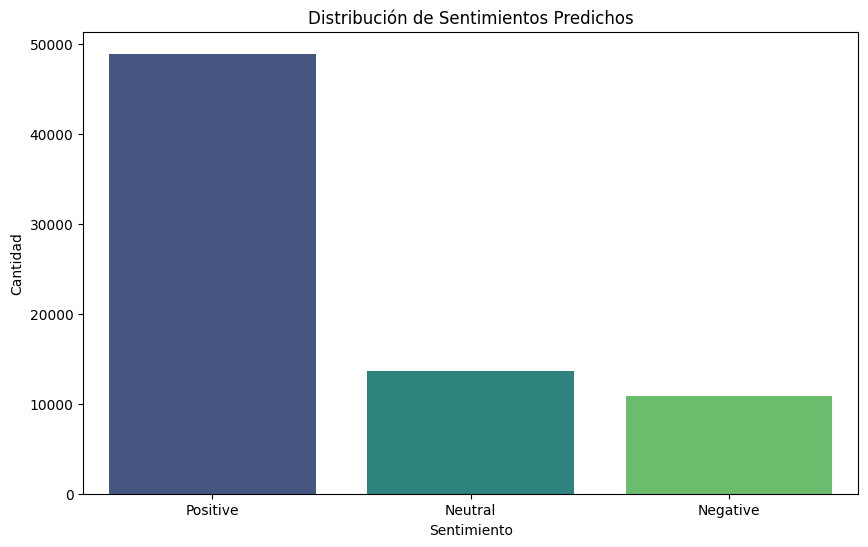

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de cada sentimiento
sentiment_counts = df['SentimentH'].value_counts()

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribución de Sentimientos Predichos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()


### LEXICON

In [12]:
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


True

In [34]:
import pandas as pd
from nltk.corpus import opinion_lexicon

# Cargar las palabras positivas y negativas del opinion lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Definir la función para el análisis de sentimientos
def sentiment_opinion_lexicon(text):
    # Tokenizar el texto y convertirlo a minúsculas
    tokens = text.lower().split()

    # Contar el número de palabras positivas y negativas en el texto
    num_positive = sum(1 for word in tokens if word in positive_words)
    num_negative = sum(1 for word in tokens if word in negative_words)

    # Determinar el sentimiento general
    if num_positive > num_negative:
        return 'Positive'
    elif num_positive < num_negative:
        return 'Negative'
    else:
        return 'Neutral'

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('dfF.csv')

# Aplicar la función sentiment_opinion_lexicon a la columna 'text' y almacenar el resultado en una nueva columna llamada 'Sentiment'
df['SentimentOL'] = df['Text'].apply(sentiment_opinion_lexicon)

# Imprimir el DataFrame con la columna 'Sentiment' añadida
df.head()


,Summary,Text,Sentiment,Text_Length,Text_lower,Text_stemmed,Text_lemmatized,Text_tokenized,SentimentOL
0,Cheaper buying direct..,Buy it from guru directly much cheaper and al...,Negative,134.0,buy it from guru directly much cheaper and al...,buy it from guru directli much cheaper and als...,buy it from guru directly much cheaper and als...,"['buy', 'it', 'from', 'guru', 'directly', 'muc...",Positive
1,Pure?,Maybe theres no sugar but that does that make ...,Negative,559.0,maybe theres no sugar but that does that make ...,mayb there no sugar but that doe that make it ...,maybe there no sugar but that doe that make it...,"['maybe', 'theres', 'no', 'sugar', 'but', 'tha...",Negative
2,little for the prie,I purchased this for my wife for Valentines Da...,Neutral,160.0,i purchased this for my wife for valentines da...,i purchas thi for my wife for valentin day my ...,i purchased this for my wife for valentine day...,"['i', 'purchased', 'this', 'for', 'my', 'wife'...",Neutral
3,Good heat,Initially there was an element of the flavor t...,Neutral,361.0,initially there was an element of the flavor t...,initi there wa an element of the flavor that s...,initially there wa an element of the flavor th...,"['initially', 'there', 'was', 'an', 'element',...",Positive
4,Not the best pop chip flavor,While the chip is still light and crispy the f...,Neutral,202.0,while the chip is still light and crispy the f...,while the chip is still light and crispi the f...,while the chip is still light and crispy the f...,"['while', 'the', 'chip', 'is', 'still', 'light...",Positive


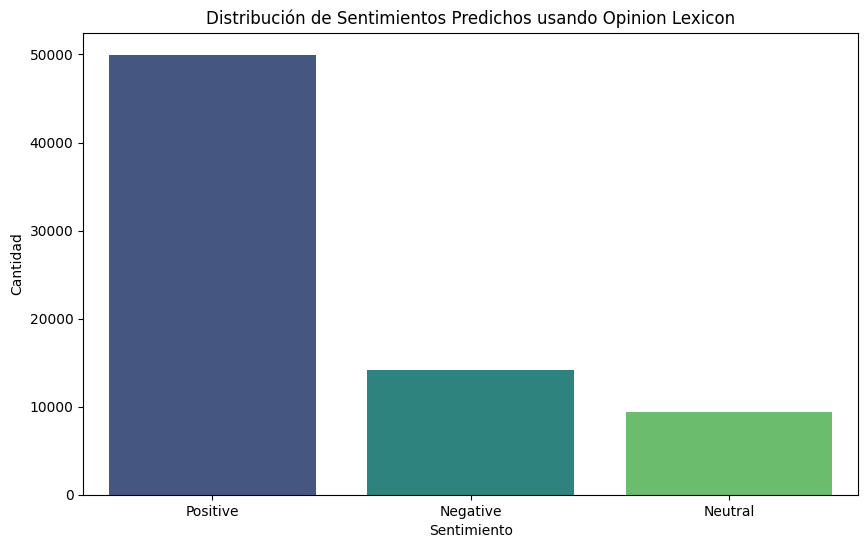

In [35]:
import pandas as pd
from nltk.corpus import opinion_lexicon
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar las palabras positivas y negativas del opinion lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Definir la función para el análisis de sentimientos
def sentiment_opinion_lexicon(text):
    # Tokenizar el texto y convertirlo a minúsculas
    tokens = text.lower().split()

    # Contar el número de palabras positivas y negativas en el texto
    num_positive = sum(1 for word in tokens if word in positive_words)
    num_negative = sum(1 for word in tokens if word in negative_words)

    # Determinar el sentimiento general
    if num_positive > num_negative:
        return 'Positive'
    elif num_positive < num_negative:
        return 'Negative'
    else:
        return 'Neutral'

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('dfF.csv')

# Aplicar la función sentiment_opinion_lexicon a la columna 'Text' y almacenar el resultado en una nueva columna llamada 'SentimentOL'
df['SentimentOL'] = df['Text'].apply(sentiment_opinion_lexicon)

# Imprimir el DataFrame con la columna 'SentimentOL' añadida
df.head()

# Contar la cantidad de cada sentimiento
sentiment_counts = df['SentimentOL'].value_counts()

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribución de Sentimientos Predichos usando Opinion Lexicon')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()


## APRENDIZAJE MAQUINA

### Regresion logistica

Cross-Validation Scores Logistic Regression with TF-IDF: [0.74864403 0.74947471 0.74825312 0.7473247  0.74409968]
Cantidad de cada sentimiento según las predicciones:
Neutral: 8606
Negative: 8542
Positive: 8434


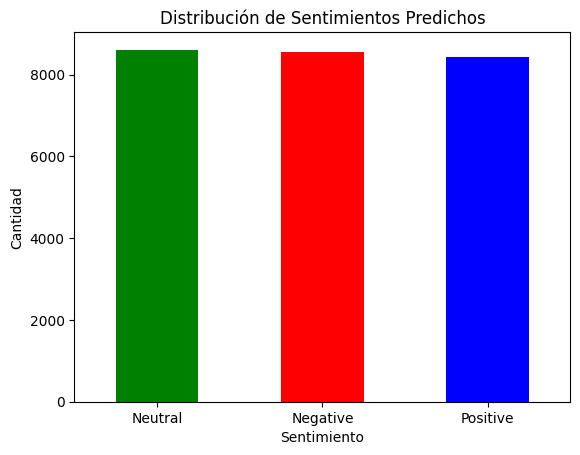

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

# Intentar cargar el DataFrame desde el archivo CSV
try:
    df = pd.read_csv('dfF.csv')
except FileNotFoundError:
    print("El archivo dfF.csv no fue encontrado.")
except pd.errors.EmptyDataError:
    print("El archivo dfF.csv está vacío.")
except pd.errors.ParserError:
    print("Hubo un error al leer el archivo dfF.csv.")
else:
    # Verificar si las columnas 'Text' y 'Sentiment' existen en el DataFrame
    if 'Text' in df.columns and 'Sentiment' in df.columns:
        # Dividir el DataFrame en datos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
        X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

        # Inicializar el TfidfVectorizer para convertir el texto en una matriz TF-IDF
        vectorizer = TfidfVectorizer()
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)

        # Inicializar el modelo de regresión logística
        lr_model = LogisticRegression(max_iter=1000)

        # Entrenar el modelo
        lr_model.fit(X_train_tfidf, y_train)

        # Evaluar el modelo usando validación cruzada
        cv_scores_lr = cross_val_score(lr_model, X_train_tfidf, y_train, cv=5)
        print("Cross-Validation Scores Logistic Regression with TF-IDF:", cv_scores_lr)

        # Predecir los sentimientos en el conjunto de prueba
        y_pred = lr_model.predict(X_test_tfidf)

        # Añadir las predicciones al DataFrame original (solo para las filas en el conjunto de prueba)
        df.loc[X_test.index, 'SentimentLR'] = y_pred

        # Filtrar y mostrar solo las filas donde 'SentimentLR' no sea NaN
        df_non_nan = df.dropna(subset=['SentimentLR'])

        # Imprimir 200 filas del DataFrame filtrado
        df_non_nan.head(200)

        # Contar la cantidad de cada sentimiento
        sentiment_counts = df_non_nan['SentimentLR'].value_counts()

        # Mostrar la cantidad de cada sentimiento
        print("Cantidad de cada sentimiento según las predicciones:")
        for sentiment, count in sentiment_counts.items():
            print(f"{sentiment}: {count}")

        # Crear una gráfica de barras
        sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
        plt.title('Distribución de Sentimientos Predichos')
        plt.xlabel('Sentimiento')
        plt.ylabel('Cantidad')
        plt.xticks(rotation=0)
        plt.show()
    else:
        print("Las columnas 'Text' y/o 'Sentiment' no se encuentran en el DataFrame.")


### Arboles de decisión

Cross-Validation Scores Decision Tree with TF-IDF: [0.63879795 0.64500366 0.6354752  0.63469338 0.63361837]
Cantidad de cada sentimiento según las predicciones:
Neutral: 8719
Negative: 8712
Positive: 8151


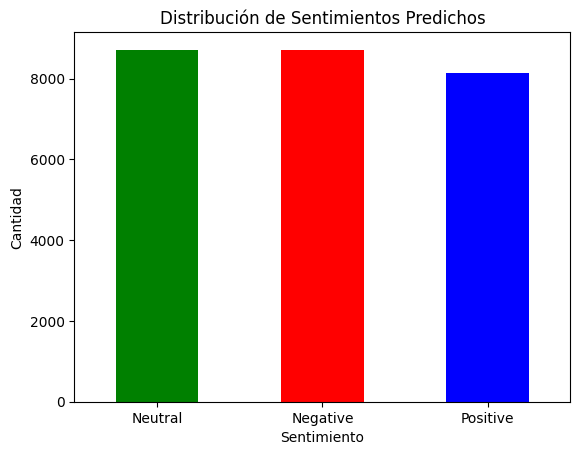

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Intentar cargar el DataFrame desde el archivo CSV
try:
    df = pd.read_csv('dfF.csv')
except FileNotFoundError:
    print("El archivo dfF.csv no fue encontrado.")
except pd.errors.EmptyDataError:
    print("El archivo dfF.csv está vacío.")
except pd.errors.ParserError:
    print("Hubo un error al leer el archivo dfF.csv.")
else:
    # Verificar si las columnas 'Text' y 'Sentiment' existen en el DataFrame
    if 'Text' in df.columns and 'Sentiment' in df.columns:
        # Dividir el DataFrame en datos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
        X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

        # Inicializar el TfidfVectorizer para convertir el texto en una matriz TF-IDF
        vectorizer = TfidfVectorizer()
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)

        # Inicializar el modelo de árbol de decisión
        dt_model = DecisionTreeClassifier()

        # Entrenar el modelo
        dt_model.fit(X_train_tfidf, y_train)

        # Evaluar el modelo usando validación cruzada
        cv_scores_dt = cross_val_score(dt_model, X_train_tfidf, y_train, cv=5)
        print("Cross-Validation Scores Decision Tree with TF-IDF:", cv_scores_dt)

        # Predecir los sentimientos en el conjunto de prueba
        y_pred = dt_model.predict(X_test_tfidf)

        # Añadir las predicciones al DataFrame original (solo para las filas en el conjunto de prueba)
        df.loc[X_test.index, 'SentimentDT'] = y_pred

        # Filtrar y mostrar solo las filas donde 'SentimentDT' no sea NaN
        df_non_nan = df.dropna(subset=['SentimentDT'])

        # Imprimir 200 filas del DataFrame filtrado
        df_non_nan.head(200)

        # Contar la cantidad de cada sentimiento
        sentiment_counts = df_non_nan['SentimentDT'].value_counts()

        # Mostrar la cantidad de cada sentimiento
        print("Cantidad de cada sentimiento según las predicciones:")
        for sentiment, count in sentiment_counts.items():
            print(f"{sentiment}: {count}")

        # Crear una gráfica de barras
        sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
        plt.title('Distribución de Sentimientos Predichos')
        plt.xlabel('Sentimiento')
        plt.ylabel('Cantidad')
        plt.xticks(rotation=0)
        plt.show()
    else:
        print("Las columnas 'Text' y/o 'Sentiment' no se encuentran en el DataFrame.")


### SVM

In [ ]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('dfC.csv')

# Calcular la cantidad de NaN en la columna 'Sentiment'
cantidad_nan = df['Sentiment'].isna().sum()

print("Cantidad de NaN en la columna 'Sentiment':", cantidad_nan)

Cantidad de NaN en la columna 'Sentiment': 0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('dfC.csv')

# Tomar una muestra aleatoria del 1% de los datos
df = df.sample(frac=0.5, random_state=42)

# Obtener las dimensiones del DataFrame
filas, columnas = df.shape

print("Número de filas:", filas)
print("Número de columnas:", columnas)

# Mapear sentimientos a valores numéricos
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

# Dividir el DataFrame en datos de entrada (X) y variable de destino (y)
X = df['Text']
y = df['Sentiment']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el TfidfVectorizer para convertir el texto en una matriz TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Inicializar el modelo de Máquinas de Soporte Vectorial (SVM)
svm_model = SVC()

# Aplicar validación cruzada (k-fold cross-validation) para evaluar el modelo de SVM con TF-IDF
cv_scores_svm = cross_val_score(svm_model, X_train_tfidf, y_train, cv=5)  # Usando 5 folds
print("Cross-Validation Scores SVM with TF-IDF:", cv_scores_svm)

# Entrenar el modelo SVM en el conjunto de entrenamiento completo
svm_model.fit(X_train_tfidf, y_train)

# Evaluar el modelo en el conjunto de prueba
X_test_tfidf = vectorizer.transform(X_test)
test_score = svm_model.score(X_test_tfidf, y_test)
print("Test Accuracy SVM with TF-IDF:", test_score)

Número de filas: 36768
Número de columnas: 8
Cross-Validation Scores SVM with TF-IDF: [0.74808771 0.73380928 0.7336393  0.7417984  0.73818429]
Test Accuracy SVM with TF-IDF: 0.7472124014141963


# REDES NEURONALES

## PREENTRENADO

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import KFold

# Función para limpiar el texto
def cleanText(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Función para realizar la codificación one-hot
def one_hot_encoding(text, vocab_size):
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts([text])
    encoded = tokenizer.texts_to_sequences([text])[0]
    return encoded

# Cargar el dataset
dfWEP = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Conversión de calificaciones en sentimientos
dfWEP['Sentiment'] = dfWEP['Rating'].apply(lambda x: 'Positive' if x > 3 else 'Negative' if x < 3 else 'Neutral')

# Elimina la columna 'Rating' y se reordena
dfWEP = dfWEP.drop('Rating', axis=1)
dfWEP = dfWEP.sample(frac=1).reset_index(drop=True)

# Limpiar los textos
dfWEP['Review'] = dfWEP['Review'].apply(cleanText)

# Obtener la longitud máxima de las secuencias
max_length = dfWEP['Review'].apply(len).max()

# Obtener todas las palabras unicas de la columna 'Text'
all_words = ' '.join(dfWEP['Review']).split()
unique_words = set(all_words)

# Calcular el tamaño del vocabulario
vocab_size = len(unique_words)
print("Tamaño del vocabulario:", vocab_size)

# Aplicar la codificación one-hot a la columna 'Review'
dfWEP['Encoded_Review'] = dfWEP['Review'].apply(lambda x: one_hot_encoding(x, vocab_size))

# Paddear las secuencias
padded_docs = pad_sequences(dfWEP['Encoded_Review'], maxlen=max_length, padding='post')

# Convertir etiquetas de sentimiento en formato de una sola columna
sentiment_labels = pd.get_dummies(dfWEP['Sentiment']).values

# Dividir el conjunto de datos en entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(padded_docs, sentiment_labels, test_size=0.2)

# Construir el modelo
modelWEP = Sequential()
modelWEP.add(Embedding(vocab_size, 100, input_length=max_length))
modelWEP.add(Conv1D(64, 5, activation='relu'))
modelWEP.add(GlobalMaxPooling1D())
modelWEP.add(Dense(32, activation='relu'))
modelWEP.add(Dropout(0.5))
modelWEP.add(Dense(3, activation='softmax'))
modelWEP.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelWEP.summary()

# Validación cruzada con K-Fold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

lossWEP = []
accWEP = []

# Iterar sobre los k-folds
for fold, (train_index, test_index) in enumerate(kf.split(Xtrain, ytrain)):
    X_train, X_val = Xtrain[train_index], Xtrain[test_index]
    y_train, y_val = ytrain[train_index], ytrain[test_index]

    # Entrenar el modelo en el conjunto de entrenamiento actual
    modelWEP.fit(X_train, y_train, epochs=10)

    # Evaluar el modelo en el conjunto de validación actual
    loss, accuracy = modelWEP.evaluate(X_val, y_val)

    # Almacenar el rendimiento del modelo en el conjunto de validación actual
    lossWEP.append(loss)
    accWEP.append(accuracy)

    # Imprimir información sobre el pliegue actual
    print(f'Fold {fold+1}/{num_folds}:')
    print(f'Tamaño conjunto de entrenamiento: {len(train_index)}')
    print(f'Tamaño conjunto de validación: {len(test_index)}')
    print(f'Precisión en el conjunto de validación: {accuracy:.4f}')
    print('\n')

# Después de la validación cruzada se evalua con el conjunto de prueba general
loss_test, accuracy_test = modelWEP.evaluate(Xtest, ytest)
print(f'Precisión en el conjunto de prueba: {accuracy_test:.4f}')

# Promedio en kfolds
meanWEP = sum(accWEP) / len(accWEP)
print("El promedio en kfolds es:", meanWEP)

# Guardar el modelo entrenado
modelWEP.save('sentiment_analysis_model.h5')

Tamaño del vocabulario: 81439
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13132, 100)        8143900   
                                                                 
 conv1d (Conv1D)             (None, 13128, 64)         32064     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                          

In [ ]:
Se tardo mucho tiempo por lo que se modificaron hyperparametros

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import KFold

# Función para limpiar el texto
def cleanText(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Función para realizar la codificación one-hot
def one_hot_encoding(text, vocab_size):
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts([text])
    encoded = tokenizer.texts_to_sequences([text])[0]
    return encoded

# Cargar el dataset
dfWEP = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Conversión de calificaciones en sentimientos
dfWEP['Sentiment'] = dfWEP['Rating'].apply(lambda x: 'Positive' if x > 3 else 'Negative' if x < 3 else 'Neutral')

# Elimina la columna 'Rating' y se reordena
dfWEP = dfWEP.drop('Rating', axis=1)
dfWEP = dfWEP.sample(frac=1).reset_index(drop=True)

# Limpiar los textos
dfWEP['Review'] = dfWEP['Review'].apply(cleanText)

# Obtener la longitud máxima de las secuencias
max_length = dfWEP['Review'].apply(len).max()

# Obtener todas las palabras unicas de la columna 'Text'
all_words = ' '.join(dfWEP['Review']).split()
unique_words = set(all_words)

# Calcular el tamaño del vocabulario
vocab_size = len(unique_words)
print("Tamaño del vocabulario:", vocab_size)

# Aplicar la codificación one-hot a la columna 'Review'
dfWEP['Encoded_Review'] = dfWEP['Review'].apply(lambda x: one_hot_encoding(x, vocab_size))

# Paddear las secuencias
padded_docs = pad_sequences(dfWEP['Encoded_Review'], maxlen=max_length, padding='post')

# Convertir etiquetas de sentimiento en formato de una sola columna
sentiment_labels = pd.get_dummies(dfWEP['Sentiment']).values

# Dividir el conjunto de datos en entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(padded_docs, sentiment_labels, test_size=0.2)

# Construir el modelo
modelWEP = Sequential()
modelWEP.add(Embedding(vocab_size, 100, input_length=max_length))
modelWEP.add(Conv1D(64, 5, activation='relu'))
modelWEP.add(GlobalMaxPooling1D())
modelWEP.add(Dense(32, activation='relu'))
modelWEP.add(Dropout(0.5))
modelWEP.add(Dense(3, activation='softmax'))
modelWEP.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelWEP.summary()

# Validación cruzada con K-Fold
num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

lossWEP = []
accWEP = []

# Iterar sobre los k-folds
for fold, (train_index, test_index) in enumerate(kf.split(Xtrain, ytrain)):
    X_train, X_val = Xtrain[train_index], Xtrain[test_index]
    y_train, y_val = ytrain[train_index], ytrain[test_index]

    # Entrenar el modelo en el conjunto de entrenamiento actual
    modelWEP.fit(X_train, y_train, epochs=4)

    # Evaluar el modelo en el conjunto de validación actual
    loss, accuracy = modelWEP.evaluate(X_val, y_val)

    # Almacenar el rendimiento del modelo en el conjunto de validación actual
    lossWEP.append(loss)
    accWEP.append(accuracy)

    # Imprimir información sobre el pliegue actual
    print(f'Fold {fold+1}/{num_folds}:')
    print(f'Tamaño conjunto de entrenamiento: {len(train_index)}')
    print(f'Tamaño conjunto de validación: {len(test_index)}')
    print(f'Precisión en el conjunto de validación: {accuracy:.4f}')
    print('\n')

# Después de la validación cruzada se evalua con el conjunto de prueba general
loss_test, accuracy_test = modelWEP.evaluate(Xtest, ytest)
print(f'Precisión en el conjunto de prueba: {accuracy_test:.4f}')

# Promedio en kfolds
meanWEP = sum(accWEP) / len(accWEP)
print("El promedio en kfolds es:", meanWEP)

# Guardar el modelo entrenado
modelWEP.save('sentiment_analysis_model.h5')

Tamaño del vocabulario: 81439
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13132, 100)        8143900   
                                                                 
 conv1d (Conv1D)             (None, 13128, 64)         32064     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                          

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tamaño del vocabulario: 127368
Tamaño del vocabulario limitado: 10000
Longitud máxima de las secuencias: 3349
(127920, 3349)
3998/3998 [==============================] - 441s 110ms/step
Neutral     60813
Negative    42948
Positive    24159
Name: Predicted_Sentiment, dtype: int64


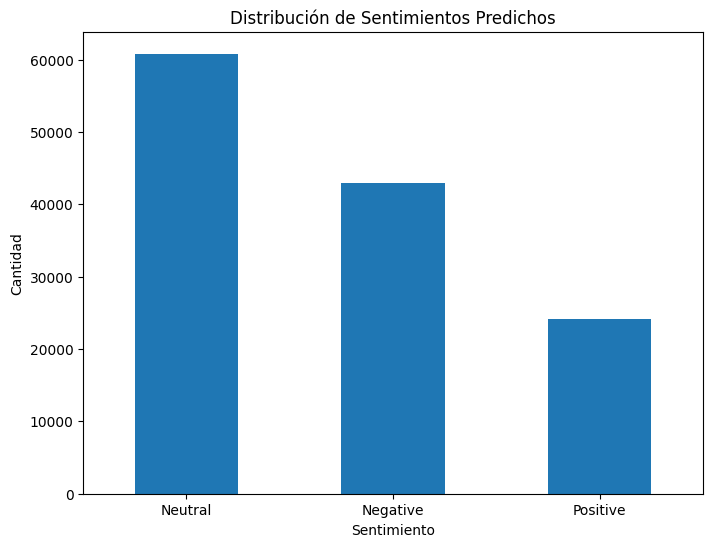

In [6]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Cargar el modelo entrenado
modelWEB = keras.models.load_model('modelo_2.h5')

def predictSentiment(arg):
    if arg == 0:
        return 'Negative'
    elif arg == 1:
        return 'Neutral'
    else:
        return 'Positive'

# Cargar el conjunto de datos
dfBalanced = pd.read_csv('dfBalanced.csv')
dfWEB = dfBalanced.copy(deep=True)

# Limpiar los textos si es necesario
# dfWEB['Text'] = dfWEB['Text'].apply(cleanText)  # Asegúrate de definir cleanText

# Obtener todas las palabras únicas de la columna 'Text'
all_words = ' '.join(dfWEB['Text']).split()
unique_words = set(all_words)

# Calcular el tamaño del vocabulario
vocab_size = len(unique_words)
print("Tamaño del vocabulario:", vocab_size)

# Limitar vocab_size a un número razonable de palabras más frecuentes (por ejemplo, 10000)
vocab_size = min(vocab_size, 10000)
print("Tamaño del vocabulario limitado:", vocab_size)

# Inicializar el tokenizer con el vocabulario del entrenamiento
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(dfWEB['Text'])

# Convertir los textos a secuencias
dfWEB['Encoded_Text'] = tokenizer.texts_to_sequences(dfWEB['Text'])

# Establecer max_length al valor esperado por el modelo (3349)
max_length = 3349
print("Longitud máxima de las secuencias:", max_length)

# Paddear las secuencias
padded_docs = pad_sequences(dfWEB['Encoded_Text'], maxlen=max_length, padding='post')

# Imprimir las secuencias paddeadas
print(padded_docs.shape)

# Hacer predicciones para todas las entidades en padded_docs
y_preds = np.argmax(modelWEB.predict(padded_docs), axis=-1)

# Convertir las predicciones numéricas a etiquetas de sentimiento
dfWEB['Predicted_Sentiment'] = y_preds
dfWEB['Predicted_Sentiment'] = dfWEB['Predicted_Sentiment'].apply(predictSentiment)

# Contar la cantidad de cada tipo de sentimiento predicho
sentiment_counts = dfWEB['Predicted_Sentiment'].value_counts()
print(sentiment_counts)

# Graficar la cantidad de tipos de clasificación
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribución de Sentimientos Predichos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


## SOBRE EL MISMO CORPUS

In [ ]:
# Después de la validación cruzada se evalua con el conjunto de prueba general
loss_test, accuracy_test = model.evaluate(Xtest, ytest)
print(f'Precisión en el conjunto de prueba: {accuracy_test:.4f}')
# Promedio en kfolds

meanWB = sum(accWB) / len(accWB)

print("El promedio en kfolds es:", meanWB)

AQUI

In [2]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import numpy as np
import pandas as pd

dfBalanced = pd.read_csv('dfBalanced.csv')
dfML = dfBalanced.copy(deep=True)
sentiment_labels = pd.get_dummies(dfML['Sentiment']).values
all_words = ' '.join(dfML['Text']).split()
unique_words = set(all_words)
vocab_size = len(unique_words)
print("Tamaño del vocabulario:", vocab_size)

# Función para realizar la codificación one-hot
def one_hot_encoding(text, vocab_size):
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts([text])
    encoded = tokenizer.texts_to_sequences([text])[0]
    return encoded


# First apply one-hot encoding to create the 'Encoded_Text' column
dfML['Encoded_Text'] = dfML['Text'].apply(lambda x: one_hot_encoding(x, vocab_size))

# Now you can calculate max_length
max_length = dfML['Encoded_Text'].apply(len).max()
print(max_length)

padded_docs = pad_sequences(dfML['Encoded_Text'], maxlen=max_length, padding='post')

# Construir el modelo
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Dividir los datos en conjuntos de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(padded_docs, sentiment_labels, test_size=0.2, random_state=42)

# Se inicializan los k-folds
num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
lossWB = []
accWB = []

batch_size = 120  # Puedes ajustar este valor según sea necesario

# Iterar sobre los k-folds
for fold, (train_index, test_index) in enumerate(kf.split(Xtrain, ytrain)):
    X_train, X_val = Xtrain[train_index], Xtrain[test_index]
    y_train, y_val = ytrain[train_index], ytrain[test_index]

    # Entrenar el modelo en el conjunto de entrenamiento actual
    model.fit(X_train, y_train, epochs=4, batch_size=batch_size)

    # Evaluar el modelo en el conjunto de validación actual
    loss, accuracy = model.evaluate(X_val, y_val)

    # Almacenar el rendimiento del modelo en el conjunto de validación actual
    lossWB.append(loss)
    accWB.append(accuracy)

    # Imprimir información sobre el pliegue actual
    print(f'Fold {fold+1}/{num_folds}:')
    print(f'Tamaño conjunto de entrenamiento: {len(train_index)}')
    print(f'Tamaño conjunto de validación: {len(test_index)}')
    print(f'Precisión en el conjunto de validación: {accuracy:.4f}')
    print('\n')

# Guardar el modelo entrenado
model.save('modelo_2.h5')
print("Modelo guardado como modelo_2.h5")

Tamaño del vocabulario: 127368
3349
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3349, 100)         12736800  
                                                                 
 conv1d (Conv1D)             (None, 3345, 64)          32064     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo guardado como modelo_2.h5


In [3]:
# Después de la validación cruzada se evalua con el conjunto de prueba general
loss_test, accuracy_test = model.evaluate(Xtest, ytest)
print(f'Precisión en el conjunto de prueba: {accuracy_test:.4f}')
# Promedio en kfolds

meanWB = sum(accWB) / len(accWB)

print("El promedio en kfolds es:", meanWB)

800/800 [==============================] - 139s 169ms/step - loss: 1.0666 - accuracy: 0.4084
Precisión en el conjunto de prueba: 0.4084
El promedio en kfolds es: 0.4155624608198802


In [4]:
from google.colab import files

# Descargar el modelo guardado
files.download('modelo_2.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tamaño del vocabulario: 127368
Longitud máxima de las secuencias: 3349
(127920, 3349)
3998/3998 [==============================] - 416s 104ms/step
Neutral     60730
Negative    43190
Positive    24000
Name: Predicted_Sentiment, dtype: int64


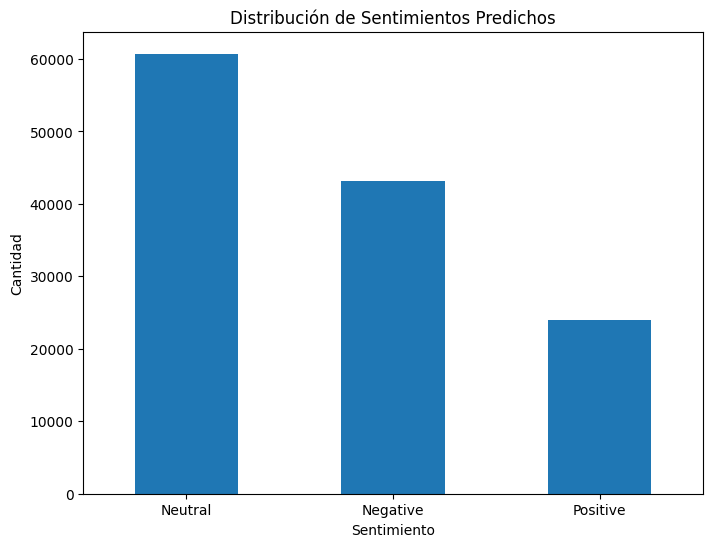

In [3]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Cargar el modelo entrenado
modelWEB = keras.models.load_model('modelo_2.h5')

def predictSentiment(arg):
    if arg == 0:
        return 'Negative'
    elif arg == 1:
        return 'Neutral'
    else:
        return 'Positive'

# Cargar el conjunto de datos
dfBalanced = pd.read_csv('dfBalanced.csv')
dfWEB = dfBalanced.copy(deep=True)

# Obtener todas las palabras únicas de la columna 'Text'
all_words = ' '.join(dfWEB['Text']).split()
unique_words = set(all_words)

# Calcular el tamaño del vocabulario
vocab_size = len(unique_words)
print("Tamaño del vocabulario:", vocab_size)

# Inicializar el tokenizer con el vocabulario del entrenamiento
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(dfWEB['Text'])

# Convertir los textos a secuencias
dfWEB['Encoded_Text'] = tokenizer.texts_to_sequences(dfWEB['Text'])

# Usar el mismo max_length que se usó durante el entrenamiento
# Puedes definir max_length directamente si lo conoces, o calcularlo basado en tus datos
# Aquí lo recalculamos para asegurarnos de que coincida con los datos de entrenamiento
max_length = dfWEB['Encoded_Text'].apply(len).max()
print("Longitud máxima de las secuencias:", max_length)

# Paddear las secuencias
padded_docs = pad_sequences(dfWEB['Encoded_Text'], maxlen=max_length, padding='post')

# Imprimir las secuencias paddeadas
print(padded_docs.shape)

# Hacer predicciones para todas las entidades en padded_docs
y_preds = np.argmax(modelWEB.predict(padded_docs), axis=-1)

# Convertir las predicciones numéricas a etiquetas de sentimiento
dfWEB['Predicted_Sentiment'] = y_preds
dfWEB['Predicted_Sentiment'] = dfWEB['Predicted_Sentiment'].apply(predictSentiment)

# Contar la cantidad de cada tipo de sentimiento predicho
sentiment_counts = dfWEB['Predicted_Sentiment'].value_counts()
print(sentiment_counts)

# Graficar la cantidad de tipos de clasificación
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribución de Sentimientos Predichos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


In [1]:
import re
import contractions
from bs4 import BeautifulSoup


def cleanText(text):
    # Deshace contracciones
    noContractions = contractions.fix(text)

    # Elimina las cadenas HTML
    noHtml = BeautifulSoup(noContractions, 'html.parser').get_text()

    # Expresion regular para eliminar todos los caracteres que no son letras o espacios en blanco
    noSimbols = re.sub(r'[^a-zA-Z\s]', '', noHtml)

    return noSimbols